# Nakagami distribution reparametrization

In this file we will explore the behavior of the parameters of the Nakagami distribution reparametrization that we propose.

Below we present the distribution for different values of $\delta$ and $\theta$.

In [1]:
from scipy.stats import multivariate_normal, nakagami, gamma
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.spatial import distance
from sklearn.neighbors import KernelDensity

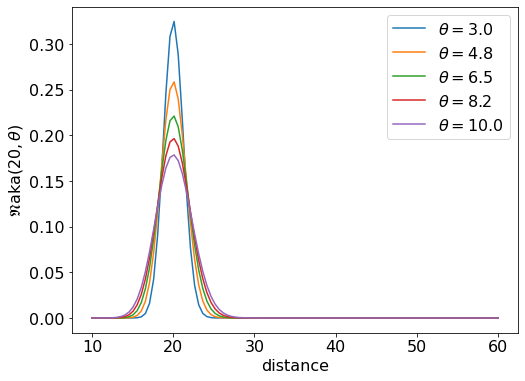

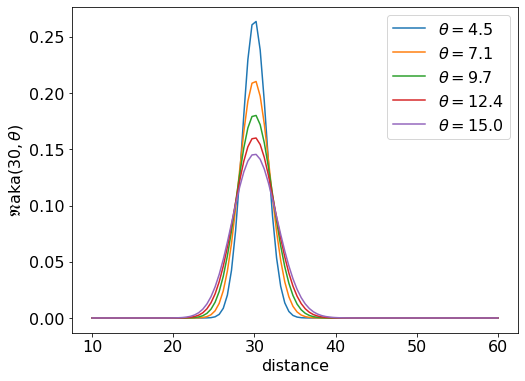

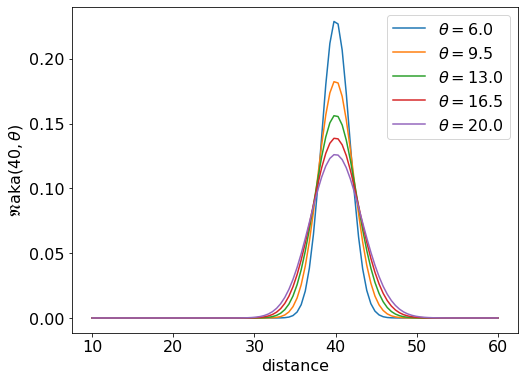

In [6]:
plt.rcParams.update({'font.size': 16})

x = np.linspace(10, 60, 100)
result = {r'$\delta$':[], r'$\theta$':[], 'variance':[]}
for radius in [20, 30, 40]:
    plt.figure(figsize=[8, 6])
    # plt.title('radius = %d'%(radius))
    plt.xlabel('distance')
    plt.ylabel(r'$\mathfrak{N}\mathrm{aka}(%d, \theta)$'%radius)
    for theta in np.linspace(.15, .5, 5)*radius:
        omega = radius**2 + theta;
        m = omega/(2*(omega-radius**2))
        naka = nakagami(m, scale=np.sqrt(omega))
        p = naka.pdf(x)
        plt.plot(x, p)        
        result[r'$\delta$'].append(radius)
        result[r'$\theta$'].append(theta)
        result['variance'].append(naka.var())
    plt.legend([r'$\theta = %1.1f$' % ti for ti in np.linspace(.15, .5, 5)*radius])

# Variance of $\mathfrak{N}\mathrm{aka}(\delta, \theta)$

In the figure below we see the relationship between the variance of the proposal function in
in relation to the spread parameter used. Here it is clear that there is a linear relationship and
that the variance is approximately half of the $\theta$ value.

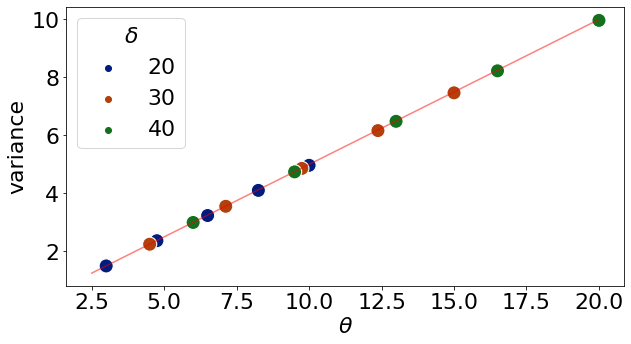

In [7]:
plt.rcParams.update({'font.size': 22})
f, ax = plt.subplots(1,1, figsize=[10, 20])
ax.set_aspect('equal')
sns.scatterplot(x=r'$\theta$', y='variance', hue=r'$\delta$', data=result, ax=ax, s=200, palette='dark')

ax.set_xlabel(r'$\theta$')
ax.plot([2.5, 20], [1.25, 10], 'r-', alpha=0.5, label=r'$var = 2\theta_k$')